In [130]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (나눔고딕)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [211]:
train_origin = pd.read_csv('train.csv')
test_origin = pd.read_csv('test.csv')

/tmp/ipykernel_39433/1786353769.py:1: DtypeWarning: Columns (15,16,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  train_origin = pd.read_csv('train.csv')


In [212]:
# cols = [
#     # 부동산 자체 특성 (건물·단지 속성)
#     '전용면적(㎡)', '전용면적구간', '전용면적(log)', '건축년도', '연식',
#     '계약년월', '주차대수', '브랜드명', '거래유형',

#     # 입지/지역 특성
#     '시군구', '구', 'x좌표', 'y좌표', '강남권여부', 'zone4_강남3',

#     # 교통 접근성
#     '버스거리', '지하철거리',

#     # 학군/교육 환경
#     '초등학교거리', '1km이내학교수', 'elite_min_dist_km',

#     # 시장/시세 흐름 변수
#     'target_prev6month', 'target_prev3month', '대장아파트거리'
# ]

# train = train_origin[cols + ['target']]
# test = test_origin[cols]

In [299]:
print(f'train 변수 개수: {train.columns.shape[0]}')
print(f'test 변수 개수: {test.columns.shape[0]}')
print('===== train 변수 =====')
print(train.columns)
print('===== test 변수 =====')
print(test.columns)

train 변수 개수: 48
test 변수 개수: 44
===== train 변수 =====
Index(['전용면적(㎡)', '전용면적구간', '전용면적(log)', '건축년도', '연식', '계약년월', '주차대수', '브랜드명',
       '거래유형', '시군구', '구', 'x좌표', 'y좌표', '강남권여부', 'zone4_강남3', '버스거리', '지하철거리',
       '초등학교거리', '1km이내학교수', 'elite_min_dist_km', 'target_prev6month',
       'target_prev3month', '대장아파트거리', 'target', '전용면적구간_구간화', '주차대수_clipped',
       '주차대수_log', '브랜드명_단순화', '버스거리_clipped', '버스거리_log', '계약연도', '계약월',
       '계약월수', '계약월수_가중치', '지하철거리_clipped', '지하철거리_log', '초등학교거리_clipped',
       '초등학교거리_log', 'elite_min_dist_km_clipped', 'elite_min_dist_km_log',
       'target_clipped', 'target_log', 'target_prev6month_clipped',
       'target_prev6month_log', 'target_prev3month_clipped',
       'target_prev3month_log', '대장아파트거리_clipped', '대장아파트거리_log'],
      dtype='object')
===== test 변수 =====
Index(['전용면적(㎡)', '전용면적구간', '전용면적(log)', '건축년도', '연식', '계약년월', '주차대수', '브랜드명',
       '거래유형', '시군구', '구', 'x좌표', 'y좌표', '강남권여부', 'zone4_강남3', '버스거리', '지하철거리',
       '초등학교거리', '

In [289]:
print(f'train 데이터 기간 : {train["계약년월"].min()} ~ {train["계약년월"].max()}')
print(f'test 데이터 기간 : {test["계약년월"].min()} ~ {test["계약년월"].max()}')

train 데이터 기간 : 201710 ~ 202306
test 데이터 기간 : 202307 ~ 202309


In [300]:
col = '대장아파트거리_log'
print(f'<{col} 정보>')
print(train[col].info())
print('==========================================================================================')
print(f'<{col} 결측치 개수>')
print(train.shape)
print(train[col].isna().sum())

<대장아파트거리_log 정보>
<class 'pandas.core.series.Series'>
RangeIndex: 109938 entries, 0 to 109937
Series name: 대장아파트거리_log
Non-Null Count   Dtype  
--------------   -----  
109938 non-null  float64
dtypes: float64(1)
memory usage: 859.0 KB
None
<대장아파트거리_log 결측치 개수>
(109938, 48)
0


<대장아파트거리_log 정보 요약>
count    109938.000000
mean          2.424618
std           1.505494
min           0.010927
25%           1.286144
50%           2.136712
75%           3.335940
max           7.436502
Name: 대장아파트거리_log, dtype: float64
<대장아파트거리_log 결측치 개수>
0


<Axes: ylabel='Frequency'>

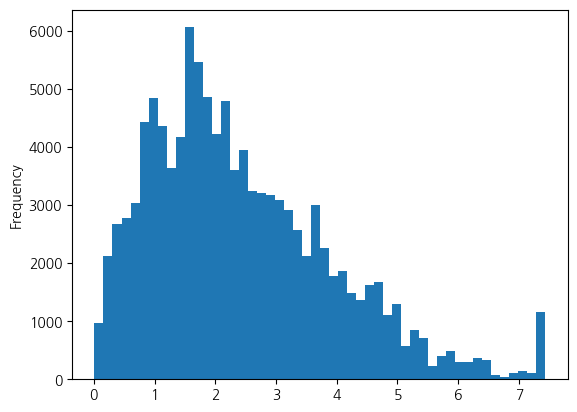

In [301]:
# 수치형 변수 확인법
print(f'<{col} 정보 요약>')
print(train[col].describe())
print('==========================================================================================')
print(f'<{col} 결측치 개수>')
print(train[col].isna().sum())
train[col].plot(kind='hist', bins=50)

<대장아파트거리_log 정보 요약>
count    9272.000000
mean        2.427880
std         1.566256
min         0.010927
25%         1.251005
50%         2.148277
75%         3.341865
max         7.436502
Name: 대장아파트거리_log, dtype: float64
<대장아파트거리_log 결측치 개수>
0


<Axes: ylabel='Frequency'>

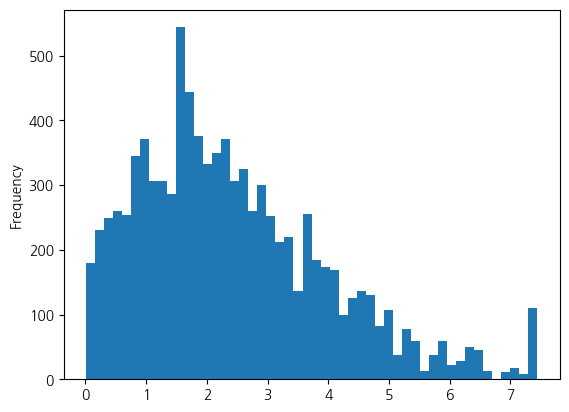

In [302]:
# 수치형 변수 확인법
print(f'<{col} 정보 요약>')
print(test[col].describe())
print('==========================================================================================')
print(f'<{col} 결측치 개수>')
print(test[col].isna().sum())
test[col].plot(kind='hist', bins=50)

In [217]:
# 범주형 변수 확인법
print(f'<{col}> 값의 개수')
print(train[col].nunique())
print('==========================================================================================')
print(train[col].value_counts())

<주차대수> 값의 개수
586
950.0     4888
1.0       4675
460.0     3593
819.0     3210
0.0       2656
          ... 
421.5        1
867.5        1
569.0        1
657.0        1
1170.5       1
Name: 주차대수, Length: 586, dtype: int64


In [218]:
# 범주형 변수 확인법
print(f'<{col}> 값의 개수')
print(test[col].nunique())
print('==========================================================================================')
print(test[col].value_counts())

<주차대수> 값의 개수
501
459.0    506
1.0      439
819.0    369
585.0    285
950.0    266
        ... 
385.0      1
309.0      1
472.0      1
182.0      1
262.0      1
Name: 주차대수, Length: 501, dtype: int64


In [219]:
# === 전용면적 ===

# nan 값 drop
train = train.dropna(subset=['전용면적(㎡)']).reset_index(drop=True)
train[train['전용면적(㎡)'].isna()]

# 이상치 처리 
    # 전체 행 : 109,938개
    # 전용면적이 250이상인 행 : 11개
    # 250 이상 > 200으로 처리
train['전용면적(㎡)'] = train['전용면적(㎡)'].clip(upper=200)
test['전용면적(㎡)'] = test['전용면적(㎡)'].clip(upper=200)

/tmp/ipykernel_39433/2087612911.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['전용면적(㎡)'] = test['전용면적(㎡)'].clip(upper=200)


In [220]:
# === 전용면적구간 ===
order_map = {
    '59㎡미만': 0,
    '약59㎡': 1,
    '60㎡이상84㎡미만': 2,
    '약84㎡': 3,
    '85㎡이상': 4
}

train['전용면적구간_구간화'] = train['전용면적구간'].map(order_map)
test['전용면적구간_구간화'] = test['전용면적구간'].map(order_map)

/tmp/ipykernel_39433/1816047018.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['전용면적구간_구간화'] = test['전용면적구간'].map(order_map)


In [240]:
# === 계약년월 ===

# float > int로 변환
train['계약년월'] = train['계약년월'].astype(int)
test['계약년월'] = test['계약년월'].astype(int)

# 계약연도, 계약월로 나누기
train['계약연도'] = train['계약년월'] // 100
train['계약월'] = train['계약년월'] % 100
test['계약연도'] = test['계약년월'] // 100
test['계약월'] = test['계약년월'] % 100

# 계약월수 파생변수 만들기
base = train['계약년월'].min()
base_year, base_month = base // 100, base % 100
train['계약월수'] = (train['계약연도'] - base_year) * 12 + (train['계약월'] - base_month)
test['계약월수']  = (test['계약연도'] - base_year) * 12 + (test['계약월'] - base_month)

# 계약월수 가중치 두기 > 최근 데이터를 더 많이 참고하도록
    # 계약월수 기준으로 1~2 사이 가중치 부여 (최근일수록 2에 가까움)
max_month = train['계약월수'].max()
train['계약월수_가중치'] = 1 + (train['계약월수'] / max_month)

/tmp/ipykernel_39433/1406592219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['계약년월'] = test['계약년월'].astype(int)
/tmp/ipykernel_39433/1406592219.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['계약연도'] = test['계약년월'] // 100
/tmp/ipykernel_39433/1406592219.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [221]:
# === 주차대수 ===

cap = train['주차대수'].quantile(0.99)
train['주차대수_clipped'] = np.clip(train['주차대수'], None, cap)
test['주차대수_clipped']  = np.clip(test['주차대수'], None, cap)

train['주차대수_log'] = np.log1p(train['주차대수_clipped'])
test['주차대수_log']  = np.log1p(test['주차대수_clipped'])

/tmp/ipykernel_39433/4005603399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['주차대수_clipped']  = np.clip(test['주차대수'], None, cap)
/tmp/ipykernel_39433/4005603399.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['주차대수_log']  = np.log1p(test['주차대수_clipped'])


In [225]:
# === 브랜드명 ===

# 희소 브랜드 > '기타'로 처리
rare_brands = ['유보라', '스위첸']

train['브랜드명_단순화'] = train['브랜드명'].replace(rare_brands, '기타')
test['브랜드명_단순화']  = test['브랜드명'].replace(rare_brands, '기타')

# 결과 확인
print(train['브랜드명_단순화'].unique())
print(test['브랜드명_단순화'].unique())

['일반' '자이' '주공' '래미안' '롯데캐슬' 'e편한세상' '센트레빌' '더샵' '아이파크' '푸르지오' '힐스테이트'
 '기타']
['일반' '더샵' '주공' '래미안' '자이' '힐스테이트' '센트레빌' '푸르지오' '롯데캐슬' 'e편한세상' '아이파크'
 '기타']


/tmp/ipykernel_39433/2935008589.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['브랜드명_단순화']  = test['브랜드명'].replace(rare_brands, '기타')


In [232]:
# === 버스거리 ===
cap_bus = train['버스거리'].quantile(0.99)
train['버스거리_clipped'] = np.clip(train['버스거리'], None, cap_bus)
test['버스거리_clipped']  = np.clip(test['버스거리'], None, cap_bus)

train['버스거리_log'] = train['버스거리_clipped']
test['버스거리_log']  = test['버스거리_clipped']

/tmp/ipykernel_39433/1093546937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['버스거리_clipped']  = np.clip(test['버스거리'], None, cap_bus)
/tmp/ipykernel_39433/1093546937.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['버스거리_log']  = test['버스거리_clipped']


In [247]:
# === 지하철거리 ===
cap_sub = train['지하철거리'].quantile(0.99)
train['지하철거리_clipped'] = np.clip(train['지하철거리'], None, cap_sub)
test['지하철거리_clipped']  = np.clip(test['지하철거리'], None, cap_sub)

train['지하철거리_log'] = train['지하철거리_clipped']
test['지하철거리_log']  = test['지하철거리_clipped']

/tmp/ipykernel_39433/753838733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['지하철거리_clipped']  = np.clip(test['지하철거리'], None, cap_sub)
/tmp/ipykernel_39433/753838733.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['지하철거리_log']  = test['지하철거리_clipped']


In [258]:
# === 초등학교거리 ===
cap_elm = train['초등학교거리'].quantile(0.99)
train['초등학교거리_clipped'] = np.clip(train['초등학교거리'], None, cap_elm)
test['초등학교거리_clipped']  = np.clip(test['초등학교거리'], None, cap_elm)

train['초등학교거리_log'] = train['초등학교거리_clipped']
test['초등학교거리_log']  = test['초등학교거리_clipped']

/tmp/ipykernel_39433/4228524035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['초등학교거리_clipped']  = np.clip(test['초등학교거리'], None, cap_elm)
/tmp/ipykernel_39433/4228524035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['초등학교거리_log']  = test['초등학교거리_clipped']


In [263]:
# === elite_min_dist_km ===
cap_elt = train['elite_min_dist_km'].quantile(0.99)
train['elite_min_dist_km_clipped'] = np.clip(train['elite_min_dist_km'], None, cap_elt)
test['elite_min_dist_km_clipped']  = np.clip(test['elite_min_dist_km'], None, cap_elt)

train['elite_min_dist_km_log'] = train['elite_min_dist_km_clipped']
test['elite_min_dist_km_log']  = test['elite_min_dist_km_clipped']

/tmp/ipykernel_39433/2265114474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['elite_min_dist_km_clipped']  = np.clip(test['elite_min_dist_km'], None, cap_elt)
/tmp/ipykernel_39433/2265114474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['elite_min_dist_km_log']  = test['elite_min_dist_km_clipped']


In [316]:
# === target 관련 변수===

# target
cap_tar = train['target'].quantile(0.99)
train['target_clipped'] = np.clip(train['target'], None, cap_tar)
#train['target_log'] = np.log1p(train['target_clipped'])

# target_prev6month
cap_prev6 = train['target_prev6month'].quantile(0.99)
train['target_prev6month_clipped'] = np.clip(train['target_prev6month'], None, cap_prev6)
test['target_prev6month_clipped']  = np.clip(test['target_prev6month'], None, cap_prev6)
train['target_prev6month_log'] = np.log1p(train['target_prev6month_clipped'])
test['target_prev6month_log'] = np.log1p(test['target_prev6month_clipped'])

# target_prev3month
cap_prev3 = train['target_prev3month'].quantile(0.99)
train['target_prev3month_clipped'] = np.clip(train['target_prev3month'], None, cap_prev3)
test['target_prev3month_clipped']  = np.clip(test['target_prev3month'],  None, cap_prev3)
train['target_prev3month_log'] = np.log1p(train['target_prev3month_clipped'])
test['target_prev3month_log']  = np.log1p(test['target_prev3month_clipped'])

/tmp/ipykernel_39433/3304460989.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['target_prev6month_clipped']  = np.clip(test['target_prev6month'], None, cap_prev6)
/tmp/ipykernel_39433/3304460989.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['target_prev6month_log'] = np.log1p(test['target_prev6month_clipped'])
/tmp/ipykernel_39433/3304460989.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [303]:
# === 대장아파트거리 ===
cap_apt = train['대장아파트거리'].quantile(0.99)
train['대장아파트거리_clipped'] = np.clip(train['대장아파트거리'], None, cap_apt)
test['대장아파트거리_clipped']  = np.clip(test['대장아파트거리'], None, cap_apt)

/tmp/ipykernel_39433/1312526860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['대장아파트거리_clipped']  = np.clip(test['대장아파트거리'], None, cap_apt)


In [293]:
print(train.columns)

Index(['전용면적(㎡)', '전용면적구간', '전용면적(log)', '건축년도', '연식', '계약년월', '주차대수', '브랜드명',
       '거래유형', '시군구', '구', 'x좌표', 'y좌표', '강남권여부', 'zone4_강남3', '버스거리', '지하철거리',
       '초등학교거리', '1km이내학교수', 'elite_min_dist_km', 'target_prev6month',
       'target_prev3month', '대장아파트거리', 'target', '전용면적구간_구간화', '주차대수_clipped',
       '주차대수_log', '브랜드명_단순화', '버스거리_clipped', '버스거리_log', '계약연도', '계약월',
       '계약월수', '계약월수_가중치', '지하철거리_clipped', '지하철거리_log', '초등학교거리_clipped',
       '초등학교거리_log', 'elite_min_dist_km_clipped', 'elite_min_dist_km_log',
       'target_clipped', 'target_log', 'target_prev6month_clipped',
       'target_prev6month_log', 'target_prev3month_clipped',
       'target_prev3month_log'],
      dtype='object')


In [323]:
new_col = [
    # 부동산 자체 특성 (건물·단지 속성)
    '전용면적(㎡)', '전용면적구간_구간화', '전용면적(log)', 
    '연식', '계약월수',
    '주차대수_log', '브랜드명_단순화', '거래유형',
    # 입지/지역 특성
    '구', 'x좌표', 'y좌표', '강남권여부',
    # 교통 접근성
    '버스거리_log', '지하철거리_log',
    # 학군/교육 환경
    '초등학교거리_log', '1km이내학교수', 'elite_min_dist_km_log',
    # 시장/시세 흐름 변수
    'target_prev6month_log', 'target_prev3month_log', '대장아파트거리_clipped'
]

In [324]:
train_new = train[new_col + ['target_clipped']]
test_new = test[new_col]

In [325]:
print(train_new.columns)
print('==========================================================================================')
print(test_new.columns)

Index(['전용면적(㎡)', '전용면적구간_구간화', '전용면적(log)', '연식', '계약월수', '주차대수_log',
       '브랜드명_단순화', '거래유형', '구', 'x좌표', 'y좌표', '강남권여부', '버스거리_log', '지하철거리_log',
       '초등학교거리_log', '1km이내학교수', 'elite_min_dist_km_log',
       'target_prev6month_log', 'target_prev3month_log', '대장아파트거리_clipped',
       'target_clipped'],
      dtype='object')
Index(['전용면적(㎡)', '전용면적구간_구간화', '전용면적(log)', '연식', '계약월수', '주차대수_log',
       '브랜드명_단순화', '거래유형', '구', 'x좌표', 'y좌표', '강남권여부', '버스거리_log', '지하철거리_log',
       '초등학교거리_log', '1km이내학교수', 'elite_min_dist_km_log',
       'target_prev6month_log', 'target_prev3month_log', '대장아파트거리_clipped'],
      dtype='object')


In [326]:
print(train_new.shape)
print(test_new.shape)
print('==========================================================================================')
print(train_new.isna().sum())
print('==========================================================================================')
print(test_new.isna().sum())

(109938, 21)
(9272, 20)
전용면적(㎡)                  0
전용면적구간_구간화               0
전용면적(log)                0
연식                       0
계약월수                     0
주차대수_log                 0
브랜드명_단순화                 0
거래유형                     0
구                        0
x좌표                      0
y좌표                      0
강남권여부                    0
버스거리_log                 0
지하철거리_log                0
초등학교거리_log               0
1km이내학교수                 0
elite_min_dist_km_log    0
target_prev6month_log    0
target_prev3month_log    0
대장아파트거리_clipped          0
target_clipped           0
dtype: int64
전용면적(㎡)                  0
전용면적구간_구간화               0
전용면적(log)                0
연식                       0
계약월수                     0
주차대수_log                 0
브랜드명_단순화                 0
거래유형                     0
구                        0
x좌표                      0
y좌표                      0
강남권여부                    0
버스거리_log                 0
지하철거리_log                0
초등학교거리_log        

In [327]:
train_new.to_csv('train_new.csv', index=False, encoding='utf-8-sig')
test_new.to_csv('test_new.csv', index=False, encoding='utf-8-sig')